In [ ]:
#Instruções do Mineda:
''''
Escolha uma tarefa de aprendizagem de máquina:
• Classificação
• Regressão
• Agrupamento (Clustering)
• Series Temporais
• Escolha, no mínimo, dois algoritmos para aplicar ao problema
• Exemplo: Para uma tarefa de classificação que pretende identificar que
alunos irão evadir da Fatec, você resolve utilizar Redes Neurais e Árvore de
Decisão
''''

#Vou usar serie temporal para prever os padrões de estilos que vão ficar em alta em qual periodo. 
#Identify trends in music over time using temporal series

In [30]:
#Pandas
import pandas as pd

import numpy as np

#Importando opendatasets para download do dataset do Kaggle
!pip install opendatasets
import opendatasets as od

# Configuração do matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Sklearn e Skforecast
from sklearn.ensemble import RandomForestRegressor

!pip install skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg

!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
od.download("https://www.kaggle.com/datasets/thedevastator/popularity-of-spotify-top-tracks-by-genre")

Skipping, found downloaded files in "./popularity-of-spotify-top-tracks-by-genre" (use force=True to force download)


In [32]:
daily_charts = pd.read_csv('data/spotify_daily_charts.csv')
dc_artists = pd.read_csv('data/spotify_daily_charts_artists.csv')
dc_tracks = pd.read_csv('data/spotify_daily_charts_tracks.csv')
dc_tracks_rp = pd.read_csv('data/spotify_daily_charts_tracks_rec_pool.csv')

In [24]:
daily_charts_raw = daily_charts[daily_charts['artist'] == 'Coldplay'][daily_charts['track_name'] == 'The Scientist']

/var/folders/ck/mnkrt7791_l84fvkqyshxyj00000gn/T/ipykernel_76568/796285080.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily_charts_raw = daily_charts[daily_charts['artist'] == 'Coldplay'][daily_charts['track_name'] == 'The Scientist']


In [33]:
daily_charts_raw.head()

,date,position,track_id,track_name,artist,streams
83,2017-01-01,84,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,21093
278,2017-01-02,79,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,26581
473,2017-01-03,74,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,30659
668,2017-01-04,69,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,32411
865,2017-01-05,66,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,34899


In [34]:
#Tratamento de dados
#Renomear a coluna de data

#Convertendo data de string para datetime e transforma em índice
data = daily_charts_raw
data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')
data = data.set_index('date')
data = data.asfreq('D')
data = data.sort_index()
data['exog_1'] = data['streams'].shift(120) #120 dias atrás pra prever hoje /// substituir por position ou juntar com outro dataset
data = data.dropna()

#fig, ax = plt.subplots(figsize=(8, 6))
#ax.plot(data['date'], data['streams']);

In [35]:
data

,position,track_id,track_name,artist,streams,exog_1
date,,,,,,
2017-05-01,64.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,41097.0,21093.0
2017-05-02,61.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,44550.0,26581.0
2017-05-03,67.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,43521.0,30659.0
2017-05-04,62.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,45774.0,32411.0
2017-05-05,68.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,42023.0,34899.0
...,...,...,...,...,...,...
2019-01-13,187.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,21441.0,29280.0
2019-01-14,188.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,23296.0,30587.0
2019-01-15,184.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,24503.0,34558.0


In [36]:
data.asfreq(freq='D', fill_value=np.nan)

,position,track_id,track_name,artist,streams,exog_1
date,,,,,,
2017-05-01,64.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,41097.0,21093.0
2017-05-02,61.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,44550.0,26581.0
2017-05-03,67.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,43521.0,30659.0
2017-05-04,62.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,45774.0,32411.0
2017-05-05,68.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,42023.0,34899.0
...,...,...,...,...,...,...
2019-01-13,187.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,21441.0,29280.0
2019-01-14,188.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,23296.0,30587.0
2019-01-15,184.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,24503.0,34558.0


<AxesSubplot:xlabel='date'>

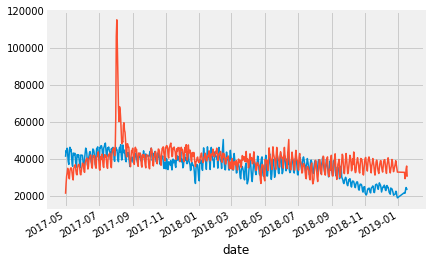

In [37]:
data['streams'].plot()
data['exog_1'].plot()

Train dates : 2017-05-01 00:00:00 --- 2018-09-05 00:00:00  (n=487)
Test dates  : 2018-09-06 00:00:00 --- 2019-01-17 00:00:00  (n=120)


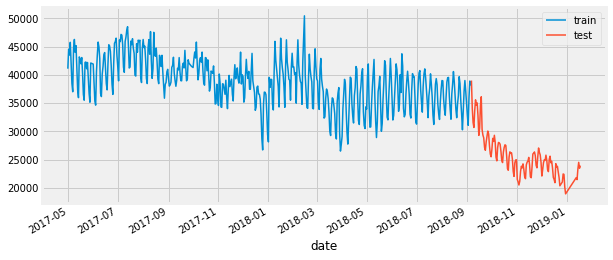

In [13]:
# Divide dados em treinamento e teste
# Para séries temporais, sempre utilizamos os dados mais recentes para teste
steps = 120
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

# Plotando os dados
fig, ax=plt.subplots(figsize=(9, 4))
data_train['streams'].plot(ax=ax, label='train')
data_test['streams'].plot(ax=ax, label='test')
ax.legend();

In [14]:
# Configura e treina um RandomForestRegressor para série temporal
# Os parâmetros foram retirados do melhor modelo encontrado no material de origem
# Para conseguir os melhores parâmetros se faz necessário realizer hyperparameter tunning (verifique artigo original)
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(max_depth=10, n_estimators=200, random_state=123),
                lags      = 120
             )

forecaster.fit(y=data_train['streams'], exog=data_train['exog_1'])
forecaster

/Users/anabeatrizleite/opt/anaconda3/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/Users/anabeatrizleite/opt/anaconda3/lib/python3.9/site-packages/skforecast/utils/utils.py:474: UserWarning: `exog` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/Users/anabeatrizleite/opt/anaconda3/lib/python3.9/site-packages/skforecast/utils/utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=10, n_estimators=200, random_state=123) 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120] 
Transformer for y: None 
Transformer for exog: None 
Window size: 120 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.series.Series'> 
Exogenous variables names: exog_1 
Training range: [0, 486] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_featu

In [16]:
# Faz predição no conjunto de teste
steps = 120
predictions = forecaster.predict(steps=steps, exog=data_test['exog_1'])
predictions.head(5)

/Users/anabeatrizleite/opt/anaconda3/lib/python3.9/site-packages/skforecast/utils/utils.py:474: UserWarning: `exog` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/Users/anabeatrizleite/opt/anaconda3/lib/python3.9/site-packages/skforecast/utils/utils.py:417: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


120    36990.437691
121    35230.155385
122    32898.547383
123    31547.925220
124    35881.799059
Name: pred, dtype: float64

In [17]:
data_test['prediction'] = predictions.tolist()

/var/folders/ck/mnkrt7791_l84fvkqyshxyj00000gn/T/ipykernel_76568/464089806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['prediction'] = predictions.tolist()


In [18]:
data_test

,position,track_id,track_name,artist,streams,exog_1,prediction
date,,,,,,,
2018-09-06,79.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,39001.0,40172.0,36990.437691
2018-09-07,93.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,34087.0,42739.0,35230.155385
2018-09-08,101.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,31577.0,36057.0,32898.547383
2018-09-09,100.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,30681.0,31793.0,31547.925220
2018-09-10,95.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,33702.0,28898.0,35881.799059
...,...,...,...,...,...,...,...
2019-01-13,187.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,21441.0,29280.0,32382.160520
2019-01-14,188.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,23296.0,30587.0,36262.183149
2019-01-15,184.0,75JFxkI2RXiU7L9VXzMkle,The Scientist,Coldplay,24503.0,34558.0,38871.610540


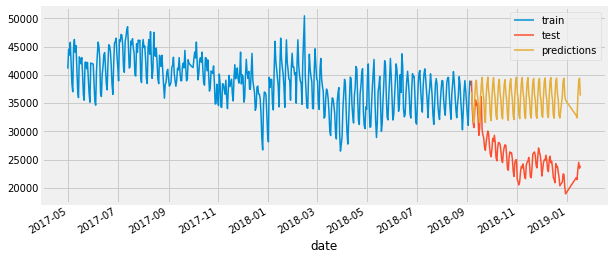

In [19]:
# Plota a predição, comparando com valores reais
fig, ax=plt.subplots(figsize=(9, 4))
data_train['streams'].plot(ax=ax, label='train')
data_test['streams'].plot(ax=ax, label='test')
data_test['prediction'].plot(ax=ax, label='predictions')
ax.legend();

#Meu modelo não possuia nenhuma queda, por isso não conseguiu acertar